In [5]:
### Importing Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Fraud.csv')

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
data = data.drop(columns=['step','nameOrig','nameDest'],axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [10]:
data.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [12]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### Encoding 
- To convert text data into numeric data we have to Encoding
- so here I apply One Hot Encoder

In [14]:
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data,columns=['type'],drop_first=True)

In [15]:
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


### Scaling
- To Bring all the data into same scale we have to do scaling
- so here I apply Min-Max-Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaler = scaler.fit_transform(data)

In [17]:
data = pd.DataFrame(data_scaler,columns=data.columns)

In [18]:
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000106,0.002855,0.003233,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000020,0.000357,0.000391,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000002,0.000003,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000002,0.000003,0.000000,0.000059,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.000126,0.000697,0.000603,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


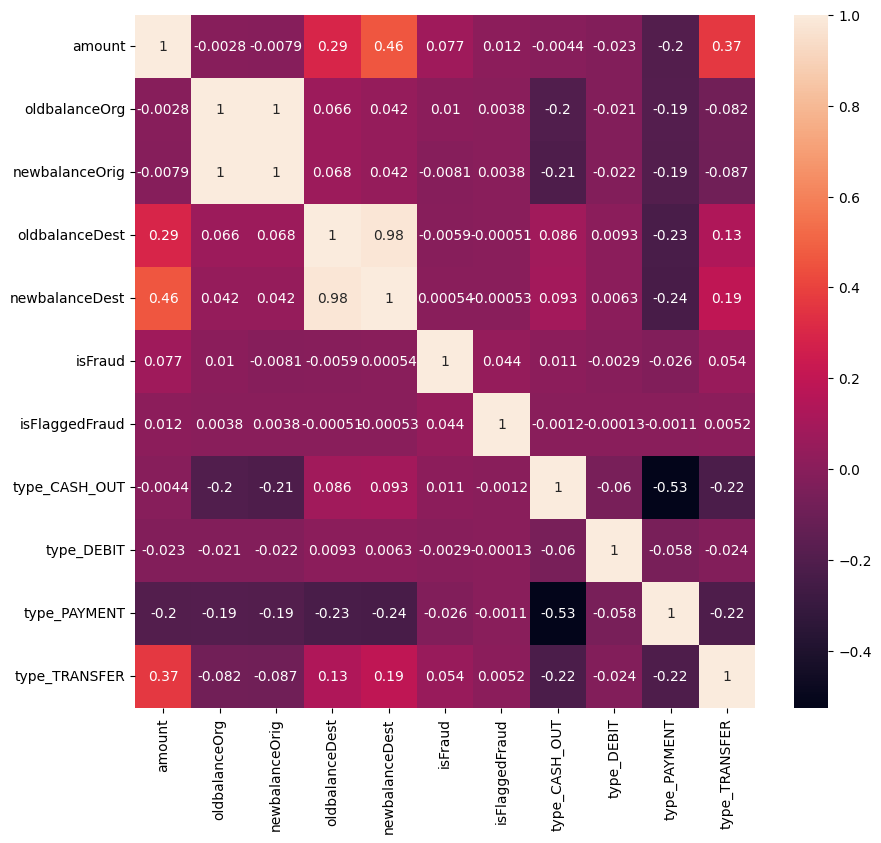

In [19]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Seperate X and Y

In [20]:
X = data.drop(columns = ['isFraud'],axis =1)

In [21]:
y = data['isFraud']

### Apply under Sampling Technique
- Here we install imblearn library for under sampling

In [22]:
#!pip install imblearn

In [23]:
data.isFraud.value_counts()

isFraud
0.0    6354407
1.0       8213
Name: count, dtype: int64

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state = 42)
x_new,y_new = rs.fit_resample(X,y)

In [25]:
y_new.value_counts()

isFraud
0.0    8213
1.0    8213
Name: count, dtype: int64

### Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new,random_state = 42,test_size = 0.3)

## Logistic Regression

In [27]:
# modeling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#prediction
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

#Evaluation

from sklearn.metrics import accuracy_score
print("Train Accuracy = " ,accuracy_score(y_train,ypred_train))
print("Test Accuracy = " ,accuracy_score(y_test,ypred_test))

print("-"*50)

#cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,x_new,y_new,cv = 5)
print("cross validation score = ",scores.mean())

Train Accuracy =  0.787528265785354
Test Accuracy =  0.7717126623376623
--------------------------------------------------
cross validation score =  0.7844268429044023


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

[[1361 1118]
 [   7 2442]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71      2479
         1.0       0.69      1.00      0.81      2449

    accuracy                           0.77      4928
   macro avg       0.84      0.77      0.76      4928
weighted avg       0.84      0.77      0.76      4928



In [ ]:
!pip install scikit-learn

## KNN

In [30]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

#prediction

y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

#Evaluation

from sklearn.metrics import accuracy_score
print("train accuracy: ",accuracy_score(y_train,y_pred_train))
print("test accuracy: ",accuracy_score(y_test,y_pred_test))

print("-"*50)

scores = cross_val_score(knn_model,x_new,y_new,cv = 5)
print("cross validation score = ",scores.mean())

train accuracy:  0.9810401809010263
test accuracy:  0.9750405844155844
--------------------------------------------------
cross validation score =  0.9758921525849715


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_test))

[[2393   86]
 [  37 2412]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2479
         1.0       0.97      0.98      0.98      2449

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



## SVM

In [33]:
#Modeling
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

#prediction
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)

scores = cross_val_score(svm_model,x_new,y_new,cv = 5)
print("cross validation score = ",scores.mean())

Train accuracy =  0.786919464254653
Test accuracy =  0.7727272727272727
--------------------------------------------------
cross validation score =  0.783513749118765


In [34]:
print(confusion_matrix(y_test,y_pred_test))

[[1361 1118]
 [   2 2447]]


In [35]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.55      0.71      2479
         1.0       0.69      1.00      0.81      2449

    accuracy                           0.77      4928
   macro avg       0.84      0.77      0.76      4928
weighted avg       0.84      0.77      0.76      4928



## NAIVE BAYES

In [36]:
#modeling
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

#predicting
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

#Evaluation
print("Train_accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test_accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)
scores = cross_val_score(nb_model,x_new,y_new,cv=5)
print("cross validation score",scores.mean())

Train_accuracy =  0.6847277787441294
Test_accuracy =  0.6730925324675324
--------------------------------------------------
cross validation score 0.6783147915004942


In [37]:
print(confusion_matrix(y_test,y_pred_test))

[[ 868 1611]
 [   0 2449]]


In [38]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.35      0.52      2479
         1.0       0.60      1.00      0.75      2449

    accuracy                           0.67      4928
   macro avg       0.80      0.68      0.64      4928
weighted avg       0.80      0.67      0.63      4928



In [39]:
from sklearn.naive_bayes import MultinomialNB
nbm_model = MultinomialNB()
nbm_model.fit(X_train,y_train)

#predicting
y_pred_train = nbm_model.predict(X_train)
y_pred_test = nbm_model.predict(X_test)

#Evaluation
print("Train_accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test_accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)
scores = cross_val_score(nbm_model,x_new,y_new,cv=5)
print("cross validation score = ",scores.mean())

Train_accuracy =  0.7644807792659593
Test_accuracy =  0.7516233766233766
--------------------------------------------------
cross validation score =  0.7807133255701277


In [40]:
from sklearn.naive_bayes import BernoulliNB
nbB_model = BernoulliNB()
nbB_model.fit(X_train,y_train)

#predicting
y_pred_train = nbB_model.predict(X_train)
y_pred_test = nbB_model.predict(X_test)

#Evaluation
print("Train_accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test_accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)
scores = cross_val_score(nbB_model,x_new,y_new,cv=5)
print("cross validation score = ",scores.mean())

Train_accuracy =  0.8974604279005044
Test_accuracy =  0.8954951298701299
--------------------------------------------------
cross validation score =  0.9005843340735243


## Decision Tree

In [44]:
#modeling

from sklearn.tree import DecisionTreeClassifier
Dt_model = DecisionTreeClassifier()
Dt_model.fit(X_train,y_train)

#prediction
y_pred_train = Dt_model.predict(X_train)
y_pred_test = Dt_model.predict(X_test)

#evaluation

print("Train_accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test_accuracy = ",accuracy_score(y_test,y_pred_test))
print("-"*50)
scores = cross_val_score(Dt_model,x_new,y_new,cv = 5)
print("cross_val_score = ",scores.mean())

Train_accuracy =  1.0
Test_accuracy =  0.9902597402597403
--------------------------------------------------
cross_val_score =  0.99129451915835


## Random Forest

In [45]:
# modeling

from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()
Rf_model.fit(X_train,y_train)

#Prection

y_pred_train = Rf_model.predict(X_train)
y_pred_test = Rf_model.predict(X_test)

#Evaulation

print("Train_accuarcy = ",accuracy_score(y_train,y_pred_train))
print("Test_accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)
scores = cross_val_score(Rf_model,x_new,y_new,cv=5)
print("cross validation = ",scores.mean())


Train_accuarcy =  1.0
Test_accuracy =  0.992086038961039
--------------------------------------------------
cross validation =  0.9920861252618229


## Ada Boosting

In [46]:
#modeling
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)

#prediction 

y_pred_train = ada_model.predict(X_train)
y_pred_test = ada_model.predict(X_test)

#Evaluation
print("Train accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)

scores = cross_val_score(ada_model,x_new,y_new,cv=5)
print("cross validation = ",scores.mean())

Train accuracy =  0.9784310314837363
Test accuracy =  0.9784902597402597
--------------------------------------------------
cross validation =  0.9745527124436404


## Gradient BOOST

In [47]:
#modeling
from sklearn.ensemble import GradientBoostingClassifier
Gb_model = GradientBoostingClassifier()
Gb_model.fit(X_train,y_train)

#prediction
y_pred_train = Gb_model.predict(X_train)
y_pred_test = Gb_model.predict(X_test)

#evaluation
print("Train accuracy = ",accuracy_score(y_train,y_pred_train))
print("Test accuracy = ",accuracy_score(y_test,y_pred_test))

print("-"*50)

scores = cross_val_score(Gb_model,x_new,y_new,cv = 5)
print("Cross validation = ",scores.mean())

Train accuracy =  0.9899982605670551
Test accuracy =  0.9888392857142857
--------------------------------------------------
Cross validation =  0.9875200634396559


In [ ]:
!pip install xgboost

## XG Boost

In [42]:
#modeling
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
#prediction
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
#evaluation
print("Train_accuracy = ",accuracy_score(y_pred_train,y_train))
print("Test accuracy = ",accuracy_score(y_pred_test,y_test))

print("-"*50)

scores = cross_val_score(xgb_model,x_new,y_new,cv = 5)
print("cross validation = ",scores.mean())


Train_accuracy =  0.999739085058271
Test accuracy =  0.9937094155844156
--------------------------------------------------
cross validation =  0.9942167638920154


## Actionable plan

- type_transfer is highly coorelated with is_fraud so from here we can conclude that we should put limit on direct transfer of money. for example: we should not transfer more than 20k per day.


- Identify individuals with low bank balance and flagged as fraud and use the model to identify individuals who have both low_bank_balance and have been flagged as a fraud. These individuals are highly correlated with the risk of commiting financial crimes in the future.

-  Contineously monitor the models prediction and refine it as necessary to ensure that it remains accurate and reliable. This may involve updating the model with new data or adjusting its paarmeters to improve its performance.

### 1. Data cleaning including missing values, outliers and multi-collinearity
- Yes, I do all these thing-treating missing value,treating outliers and multi-collinearity.

### 2. Describe your fraud detection model in elaboration. 
- My fraud detection model consists of several components, including data preprocessing, feature engineering and modeling.

Data Preprocessing: In this step, the raw data is cleaned, transformed and preprocessed to prepare it for analysis. This can involve removing duplicates ,handling missing value and transforming the data into a suitable format for modeling .

Modeling: In this step, the preprocessed and engineered data is used to train a machine learning algorithm to make prediction about whether a given transaction or activty is fraudulent. There are several types of machine learning algorithm that can be use such as 

1. Logistic Regression
2. KNN
3. SVM(support vector machine)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Ada Boosting
8. Gradient Boosting
9. XG Boost

XG Boost algorithm gives Maximum Accuracy of 99% so thats why we select XG Boost Algorithm for final model.

### 3. How did you select variables to be included in the model?
Basically, I selected only those variable which contribute more towards target variable or more correlated with target variable.
Also I drop some of variable like "step","nameOrig","nameDest" which not contribute towards target variable.


### 4. Demonstrate the performance of the model by using best set of tools. 
To demonstrate the performance of a fraud detection model we need to evaluate its accuracy,precision,recall,F1-score. These matrics help us to understand how well the model is performing and how well its flase positive and false negative it is producing.

Tools such as Python and its libraries such as pandas,numpy and matplotlibs, sklearns are commonly used for data Preprocessing and feature engineering and modeling.

### 5. What are the key factors that predict fraudulent customer? 

The key factorss that can help predict fraudulent customers and identified through exploratory data analysis (EDA) and feature engineering.

Here are some of the key factors that can be identified through Data Analysis: 

- Payment method: certain payment method may be more prone to fraudulent activity,such as type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER.

- User behaviou : user behaviour can be analyzed to identify patterns that may indicates fraudulent activities such as multiple failed login attempts or unusual navigation patterns on website.

- Account information : Account information , such as the account balance, oldbalanceOrig,newbalanceOrig,oldbalanceDest, newbalanceDest can also be analyzed to identify potential fraud.

### 6. Do these factors make sense? If yes, How? If not, How not

YES, these factors make sense once you know which customer chance is high to doing fraud in future so you can easily stop them save company from losses.

### 7. What kind of prevention should be adopted while company update its infrastructure?

- Continuously monitor the model's predictions and refine it as necessary to ensure that it remains accurate and reliable. This may involve updating the model with new data or adjusting its parameters to improve its performance.

- Identify individuals with low bank balance and flagged as fraud and Use the model to identify individuals who have both low bank balance and have been flagged as fraud.

- Continuously monitor the model's predictions and refine it as necessary to ensure that it remains accurate and reliable. This may involve updating the model with new data or adjusting its parameters to improve its performance.


### 8.Assuming these actions have been implemented, how would you determine if they work ? 

1. To determine if the prevention measures implemented during the infrastructure update are effective

2. Fraud detection rate: The fraud detection rate is the percentage of fraud attempts that are successfully detected and prevented by the system.

3. False positive rate: The false positive rate is the percentage of legitimate transactions that are incorrectly flagged as fraudulent.

4. Transaction rejection rate: The transaction rejection rate is the percentage of transactions that are rejected due to suspicion of fraud.

5. User satisfaction: User satisfaction is an important factor in determining the effectiveness of fraud prevention measures.

6. Finally, the financial impact of fraud prevention measures should also be considered. By measuring the cost of fraud prevention measures against the potential losses from fraud, companies can determine if the prevention measures are cost-effective.